In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import qutip as qt

# Introduction to Quantum Optics

## Example: Photons in a cavity

# Cavity 

What is a photon and how do we think about it? We can start with a cavity. Below is a *nanobeam cavity*. It is essentially a beam of a material with a high index of refraction surrounded by air. The light travels through the beam. There are three groups of holes. Each group of holes acts like a mirror. The space in between the two mirrors is a cavity. Light reflects from the first mirror but some of it leaks into the cavity. The light that leaks into the cavity gets trapped and stays for a long time until it leaks out of the sides. 

<!-- %%html -->
<video width="560" height="315" controls>
  <source src="cavity_res.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>

### The Hamiltonian

$\hat{n}$ is the number operator. It counts the number of photons in the cavity. $\hat{a}$ is the annihilation operator. It removes a photon from the cavity. $\hat{a}^\dagger$ is the creation operator. It adds a photon to the cavity.

$$
H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) 
$$

The decay operator is $\hat{a}$. It removes a photon from the cavity. The decay rate is $\kappa$. The decay rate is the rate at which photons leak out of the cavity. You might notice that even when there are no photons, there is still some energy in the cavity. This is called the *zero point energy*. It is the energy of the vacuum.


Total run time:   0.00s
10.0%. Run time:   3.62s. Est. time left: 00:00:00:32
20.0%. Run time:   3.63s. Est. time left: 00:00:00:14
30.0%. Run time:   3.64s. Est. time left: 00:00:00:08
40.0%. Run time:   3.66s. Est. time left: 00:00:00:05
50.0%. Run time:   3.68s. Est. time left: 00:00:00:03
60.0%. Run time:   3.69s. Est. time left: 00:00:00:02
70.0%. Run time:   3.74s. Est. time left: 00:00:00:01
80.0%. Run time:   3.81s. Est. time left: 00:00:00:00
90.0%. Run time:   3.83s. Est. time left: 00:00:00:00
100.0%. Run time:   3.90s. Est. time left: 00:00:00:00
Total run time:   3.98s
10.0%. Run time:   4.03s. Est. time left: 00:00:00:36
20.0%. Run time:   4.37s. Est. time left: 00:00:00:17
30.0%. Run time:   4.68s. Est. time left: 00:00:00:10
40.0%. Run time:   5.01s. Est. time left: 00:00:00:07
50.0%. Run time:   5.37s. Est. time left: 00:00:00:05
60.0%. Run time:   5.69s. Est. time left: 00:00:00:03
70.0%. Run time:   6.01s. Est. time left: 00:00:00:02
80.0%. Run time:   6.31s. Est. ti

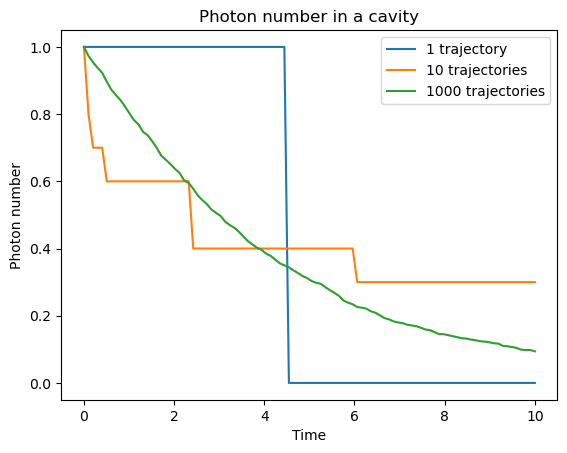

In [2]:
# Define the Hamiltonian
N = 1 + 1  # number of photon states
H = qt.num(N) + 1/2

gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * qt.destroy(N)]

# Define the initial state
psi0 = qt.basis(N, N - 1)

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1)
res2 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=10)
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res1.expect[0], label='1 trajectory')
ax.plot(t, res2.expect[0], label='10 trajectories')
ax.plot(t, res3.expect[0], label='1000 trajectories')
ax.set_xlabel('Time')
ax.set_ylabel('Photon number')
ax.set_title('Photon number in a cavity')
ax.legend()

# Appendix 

## Formalism of quantum optics 

The formalism of quantum optics is very intuitive. Everything is written in terms of matrices. The Hamiltonian $\hat{H}$ is matrix that acts as the *energy* operator. The Hamiltonian tells you about the time evolution of the system via the *Schr&ouml;dinger equation*. 

$$
\hat{H} \left| \psi \right> = -\frac{\partial}{\partial t} \left| \psi \right>
$$

Here, E is the energy. Note that $\hat{H}$ is a matrix, $\left| \psi \right>$ is a vector (actually, it's a ray, but they're pretty much the same), and $E$ is a number. The solution to this gives you a wavefunction $\left| \psi \right>$ with some time evolution and energy. 